# **STATISTIC**
Cheat Sheet by Glen

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

pd.set_option('display.max_columns', None)

Dapet data harus langsung visual dulu

| **Name** | **Function** |
| :-- | :-- |
| read_csv('namefile) | Import File |
| .info() | to check column, null dan dtype |
| .isna.sum() | hitung berapa banyak null/nan|
| .describe(include='all') | brief isi database|
| .value_counts() | cek berapa banyak data|
| .unique() | cek berapa banyak unik|

In [12]:
df = pd.read_csv("dataset/bestsellers with categories.csv")
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Outlier

<Axes: xlabel='Price', ylabel='Count'>

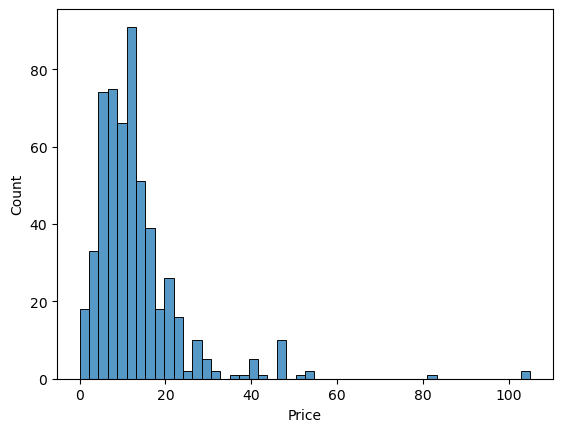

In [19]:
sns.histplot(df['Price'])

In [16]:
from scipy import stats
from scipy.stats import normaltest

stats.zscore(df['Price']).sort_values()

# if > 3 outlier

42    -1.209335
71    -1.209335
381   -1.209335
116   -1.209335
505   -1.209335
         ...   
346    3.683394
151    3.775710
473    6.360547
69     8.483807
70     8.483807
Name: Price, Length: 550, dtype: float64

In [18]:
df_copy = df.copy()
df_copy['zscore'] = stats.zscore(df['Price'])
df_copy[df_copy['zscore']>3]

,Name,Author,User Rating,Reviews,Price,Year,Genre,zscore
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction,8.483807
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction,8.483807
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction,3.775710
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction,3.591078
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction,3.037184
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction,3.037184
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction,3.037184
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction,3.037184
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction,3.037184
276,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2014,Non Fiction,3.037184


<Axes: xlabel='Price', ylabel='Count'>

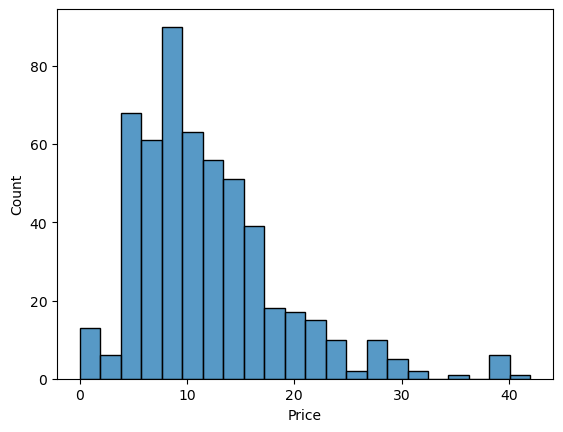

In [21]:
sns.histplot(df_copy[df_copy['zscore']<3]['Price'])

<Axes: xlabel='Price', ylabel='Count'>

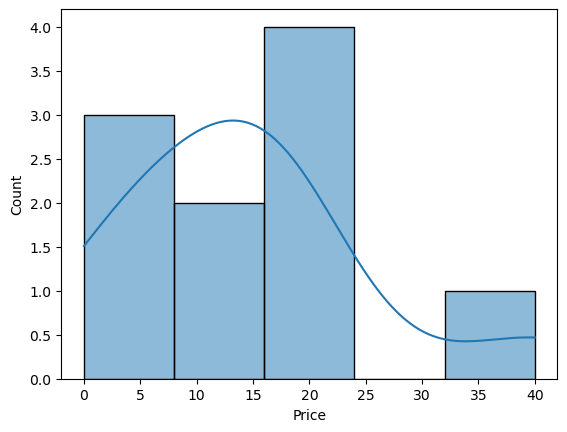

In [17]:
# when sampling the data is always normal distribution
sns.histplot(df['Price'].sample(10,random_state=0),kde=True)

<hr>

### Variable Scale of Measurement

Qualitative :
- Nominal : Two or more categories but not have order alias ga bisa diranking contohnya gender, tipe buah, yes or no
- Ordinal : pengelompokan kategori tapi bisa diranking (misal SD, SMP, SMA, satisfied, normal, noe satisfied)

Quantitative
- Continuous : Percentage, height, weight (samua yang berkelanjutan angkanya dan bisa koma)
- Discrete : Number of family, number of child (semua yang naiknya cuma bisa per satu), manusia ga bisa nambah 0.5
- Interval : Temperature,angka bisa 0 dan negatif, ga make sense kalau dikali atau bagi
- Ratio : Tinggi badan 180cm, tambahan dari interval tapi ga bisa negatif dan 0, make sense kalau dikali atau bagi




![Scale of Measurement Summary.png](<attachment:Scale of Measurement Summary.png>)
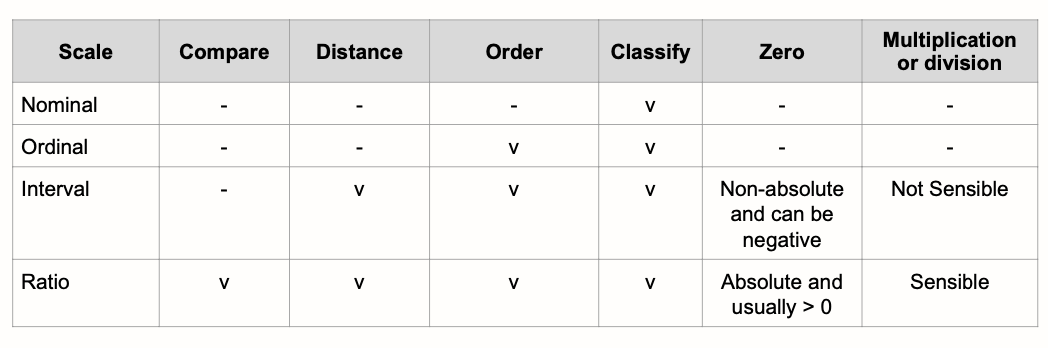

<hr>

### Sample Take

![Sample Take.jpg](<attachment:Sample Take.jpg>)
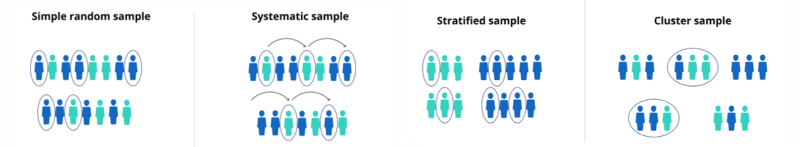

Simple Random : beneran ambil secara random

Systematic Sample : ada step yang diikuti untuk ambil sampe, misal setiap 2 orang ambil sample

Stratified : Sample di bagi per kategori, lalu ambil sesuai persentase kategori sample dari populasinya, misal cewe diambil 1 dan cowo 2 karena persentase cowo lebih 2x dari cewe

Cluster Sample : dikelompokan, misal ambil perkeluarga

<hr>

## **Descriptive Statistic**
includes the construction of graphs, charts, tables, and calculation of various descriptive measures such as averages, variation, and percentile.


### **Numerical Summary**

1. Measure of Central Tendency (Mean, Median, Mode)
2. Measure of Spread (Range, Quartile, Variance, Standard Deviation)

#### **1. Numerical Summary**

- Mean .mean() : Rata - rata dari sebuah kolom, total semua data dibagi dengan jumlah data. rawan error kalau ada outlier
- Median .median() : Mencari nilai tengah dari sebuah list, semua data diurutkan dulu lalu dicari nilai tengah. Paling oke kalau data not distribution normal
- Mode df.mode() : Mencari value yang paling sering muncul, biasa digunakan kalau variablenya string

#### **2. Measure of Spread**

- Range .range() : mencari jarak antara data paling besar dan paling kecil (max - min)
- Quartile .quartile(0.25) : Membagi data menjadi 4 sama rata (0.25, 0.5, 0.75) 25% 50% 75%
    - Upperbound : Q3 + IQR * 1.5 
    - Lowerbound : Q1 - IQR * 1.5 


- Variance .var() : a measurement of the spread between numbers in a data set (bisa dicari dari akar STD)
- Standard Deviation .std() : angka yang mengukur penyebaran data, semakin kecil dari nilai rata - rata semakin bagus

In [4]:
#Range
max_price = df["Price"].max()
min_price = df["Price"].min()

range_price = max_price-min_price
range_price

105

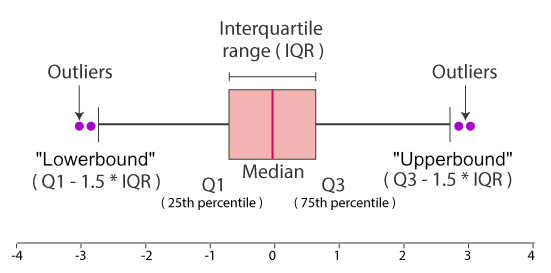

In [5]:
def quantiles(dataframe = df ,columns="Price"):
    Q1 = dataframe[columns].quantile(0.25)
    Q2 = dataframe[columns].quantile(0.5)
    Q3 = dataframe[columns].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + IQR * 1.5 
    lower_bound = Q1 - IQR * 1.5
    return Q1,Q2,Q3,IQR,upper_bound,lower_bound

value = quantiles(dataframe=df,columns='Price')

print(f'''
Q1 = {value[0]}
Q2 = {value[1]}
Q3 = {value[2]}
IQR = {value[3]}
Upper Bound = {value[4]}
Lower Bound = {value[5]}
''')



Q1 = 7.0
Q2 = 11.0
Q3 = 16.0
IQR = 9.0
Upper Bound = 29.5
Lower Bound = -6.5



In [6]:
#Variance & Standard Deviation
df["Price"].var()
df["Price"].std()

10.84226197842238

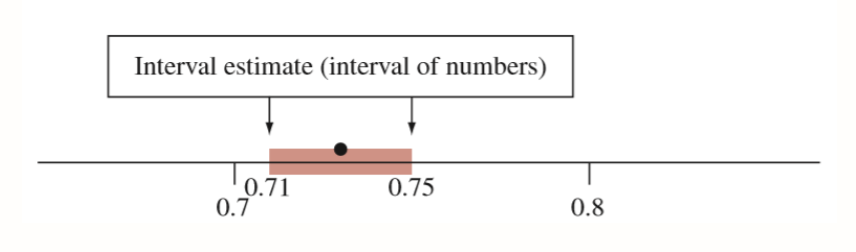

<hr>

### **Normal Distribution Test**
apakah persebaran data normal alias tidak ada outlier yang menyebabkan data jadi skew atau kurtosis


#### **0.Graphical**

- Histplot sns.hitsplot(data=,kde=True)
- Boxplot


<Axes: xlabel='Price', ylabel='Count'>

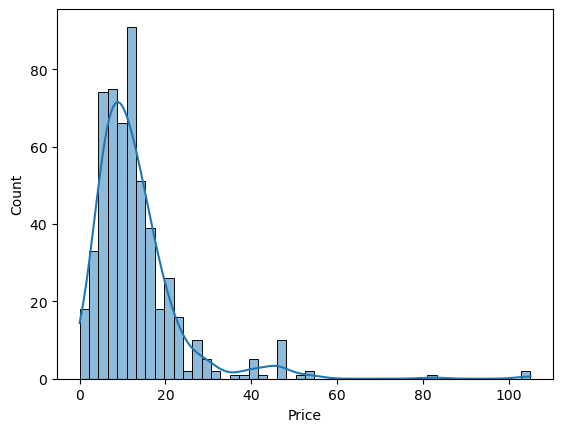

In [7]:
sns.histplot(df["Price"],kde=True) # KDE to show line

<Axes: xlabel='Price'>

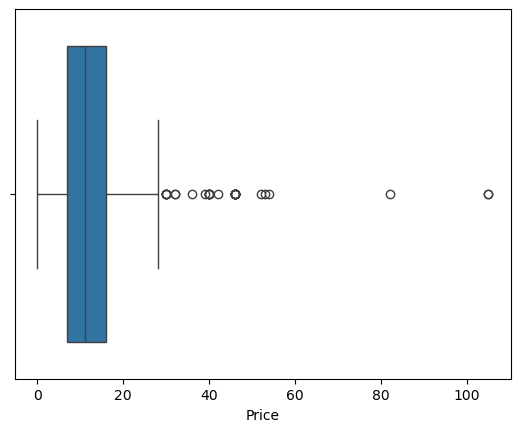

In [8]:
sns.boxplot(data=df,x='Price')

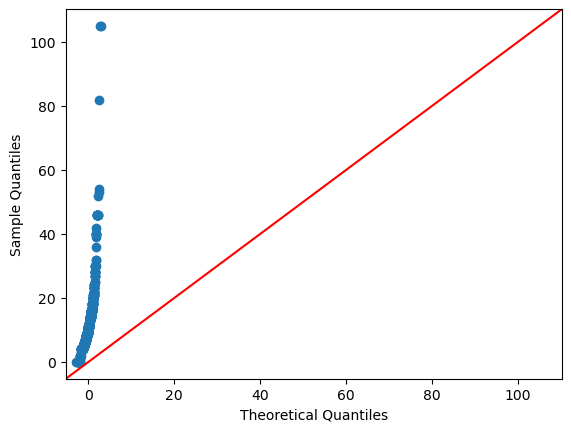

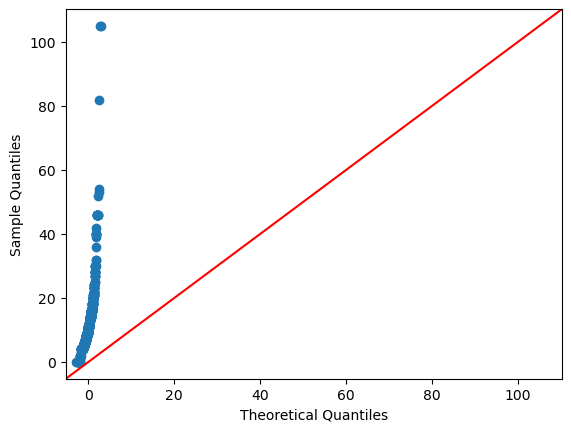

In [9]:
sm.qqplot(df['Price'],line='45')

#### **1.SKEW**

Skew adalah melihat seberapa miring persebaran data. bisa menggunakan function atau dari gambar.

langkah pertama biasa melihat dari gambar dulu baru dibuktikan dengan test .skew()

##### **SKEW Graphic**


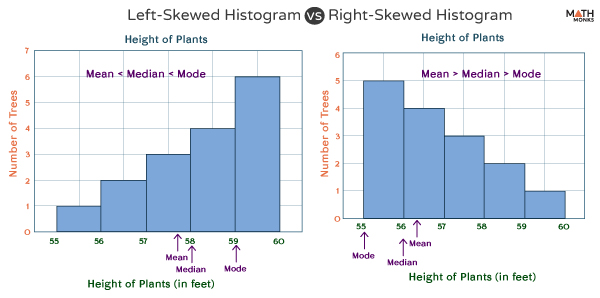

##### **SKEW Function**

In [10]:
skewness = df["Price"].skew()

#Conclusion
if skewness == 0:
    print(f"Skew Test Result is {skewness} which mean table Distribution is Normal")
elif skewness > 0:
    print(f"Skew Test Result is {skewness} which mean table Distribution is NOT Normal and RIGHT Skewed")
elif skewness < 0:
    print(f"Skew Test Result is {skewness} which mean table Distribution is NOT Normal and LEFT Skewed")


Skew Test Result is 3.685056537836339 which mean table Distribution is NOT Normal and RIGHT Skewed


#### **2.Kurtosis**

Kurtosis adalah melihat shape curve nya semakin tinggi atau semakin landai akan diliaht sebagai not normal, kurtosis normal ada di angka 0/3 tergantung teori (Pearson = 3, Fisher = 0)

Python use Fisher Normal = 0

Tips : **L** eptopkurtic - **M** esopkurtic - **P** latykurtic (dari tinggi ke normal ke landai)

In [ ]:
kurtosis = df['Price'].kurtosis()

# conclusion
if kurtosis > 0:
    print(f'''Kurtosis = {kurtosis}. The data is Lepto kurtic''')
elif kurtosis == 0:
    print(f'''Kurtosis = {kurtosis}. The data is Meso Kurtic or Normal''')
elif kurtosis < 0:
    print(f'''Kurtosis = {kurtosis}. The data is Platy kurtic''')

Kurtosis = 22.43352032785043. Merupakan Lepto kurtic


| **Test** | **Method** | **Size Sample** | **Limitations** | **Function** |
| :-- | :-- | :-- |:-- | :-- |
| Kolmogorov-Smirnov | Compares the empirical CDF of the sample with the CDF of the specified distribution. | Works well for large sample sizes (e.g., n>30) | Sensitive to sample size; may not be as powerful for small samples. | kstest |
| Lilliefors Test | Similar to K-S but uses sample mean and standard deviation. | Useful for small to moderate samples (e.g.,n<50) when parameters are unknown  | More applicable to small samples; less powerful than K-S for large samples. | lilliefors |
| Shapiro-Wilk Test | Calculates a W statistic based on ratios of ordered sample values to expected normal values | Particularly powerful for small samples (recommended for n<50, but can be used up to n=2000) | Less powerful for very large datasets; sensitive to outliers.| shapiro |
| D'Agostino-Pearson | Computes a test statistic combining measures of skewness and kurtosis, compared to a chi-squared distribution. | Suitable for larger sample sizes (e.g., n>20 and preferably n>100). | Requires larger sample size to be reliable (typically n>20) | normaltest|

#### **3.Kolmogorov Smirnov Test (K-S)**

In [12]:
from scipy.stats import kstest

# Fill Ho and Ha First
Ho = "We assume Data is Normally Distributed" # Ho typically no difference, no effect, no relationship
Ha = "We assume Data is NOT Normally Distributed"

# Put Which function to use here
statistic,pvalue = kstest(df['Price'],'norm')

#Conclusion
if pvalue >= 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue >= 0.05. Fail to reject Ho. 
    {Ho}
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue < 0.05. Reject Ho. 
    {Ha}''')


    pvalue = 0.0. pvalue < 0.05. Reject Ho. 
    We assume Data is NOT Normally Distributed


#### **4.Lilliefors**
Upgrade dari K-S lebih oke buat data kecil

In [13]:
from statsmodels.stats.diagnostic import lilliefors

# Fill Ho and Ha First
Ho = "We assume Data is Normally Distributed" # Ho typically no difference, no effect, no relationship
Ha = "We assume Data is NOT Normally Distributed"

# Put Which function to use here
pvaluell = lilliefors(df['Price'])[1]

#Conclusion
if pvaluell >= 0.05:
    print(f'''
    pvalue = {pvaluell}. pvalue >= 0.05. Fail to reject Ho. 
    {Ho}
    ''')
else:
    print(f'''
    pvalue = {pvaluell}. pvalue < 0.05. Reject Ho. 
    {Ha}''')


    pvalue = 0.0009999999999998899. pvalue < 0.05. Reject Ho. 
    We assume Data is NOT Normally Distributed


#### **5.Shapiro Wilk**
Only for Normal Distribution

In [14]:
from scipy.stats import shapiro

# Fill Ho and Ha First
Ho = "We assume Data is Normally Distributed" # Ho typically no difference, no effect, no relationship
Ha = "We assume Data is NOT Normally Distributed"

# Put Which function to use here
statistic,pvaluesw = shapiro(df['Price'])

#Conclusion
if pvaluesw >= 0.05:
    print(f'''
    pvalue = {pvaluesw}. pvalue >= 0.05. Fail to reject Ho. 
    {Ho}
    ''')
else:
    print(f'''
    pvalue = {pvaluesw}. pvalue < 0.05. Reject Ho. 
    {Ha}''')


    pvalue = 4.692729410463792e-30. pvalue < 0.05. Reject Ho. 
    We assume Data is NOT Normally Distributed


#### **6.D’Agostino and Pearson's**

In [15]:
from scipy.stats import normaltest

# Fill Ho and Ha First
Ho = "We assume Data is Normally Distributed" # Ho typically no difference, no effect, no relationship
Ha = "We assume Data is NOT Normally Distributed"

# Put Which function to use here
statistic,pvaluedap = normaltest(df['Price'])

#Conclusion
if pvaluedap >= 0.05:
    print(f'''
    pvalue = {pvaluedap}. pvalue >= 0.05. Fail to reject Ho. 
    {Ho}
    ''')
else:
    print(f'''
    pvalue = {pvaluedap}. pvalue < 0.05. Reject Ho. 
    {Ha}''')


    pvalue = 4.142370491707519e-103. pvalue < 0.05. Reject Ho. 
    We assume Data is NOT Normally Distributed


<hr>

## **Hypothesis Table**

|  | **Parametric** | **Non-parametric** | Null Hypotesis (Ho) |
|---|---|---|---|
| Distribusi | Normal | Normal/Not Normal |
| Variance  | Homogen | Any |
| Data set relation | Independent | Any |
| Usual Central Measure | Mean | Median |
| Benefit | Can draw more conclusions | Simplicity, Less affected by outliers |
| Test | | |
| Correlation Test | PearSON | SpearMAN | Ho: Between -1 0 1, nearer 0 is weaker/not corelated | 
| 1 Sample | T Test 1 Sample | Wilcoxon | Ho: Sample sama seperti mean teoritis yang diberi |
| Independent, 2 Sample | T Test 2 Sample | Mann-Whitney | Ho : Kedua Sample tidak ada perbedaan / sama(=)
| Independent >2 Sample | One Way Anova (F-Test) | Kruskal-Wallis | Ho : Semua sample tidak ada perbedaan / sama (u1=u2=u3)
| Paired 2 sample | T Test 2 Sample Paired | Wilcoxon | Ho : Tidak ada perubahan dari kedua kondisi / sama (uawal = uakhir)

<hr>

## **Hypothesis Testing**

### **Null Hypotesis and Alternative Hypotesis**

Null Hypotesis or Ho adalah dugaan awal sebelum sebuah research dimulai, biasanya Ho ini selalu no effect, no difference, no relationship

Contoh penggunaan :
- Ho: Distribusi Data Normal
- Ho: Hyundai = Toyota
- Ho : Lemak Orang Olahraga = Lemak Orang tidak Olahraga
- Ho : Brand tidak ada kaitan dengan transmision



---**P Value**---

Result of testing (my understanding if small, it means chance to right is small)
if P Value < 0.05 it will Successfully reject the Ho

if P value > 0.05 it will Failed to reject the Ho

P value always default to Two tail, if want to use one tail but already use two tail, we need to half it



---**One tail vs Two Tail**---
- One tail ( > < ≥ ≤ )
    - Hanya mencari satu sisi saja
- Two Tail ( = ≠ )
    - Mencari kedua sisi

<hr>

### **Confidence Internal**

This how to manualy calculate confidence interval

Hasil dari confidence interval:
- Mean sample +- 0.9081239714468761
- conf_int_plus = 14
- conf_int_minus = 12

**Kesimpulan**
- Rata-rata harga buku teoritis 10 dollar --> diluar confidence interval (12 - 14)
- Jadi artinya, rata-rata harga buku di sample berbeda significant dengan rata-rata teoritis.Bisa dibilang harga sample mean lebih mahal dibanding mean all 10 dollar.

Confidence Interval 95 = 5% Alpha

"Confidence interval 95% artinya kita cukup yakin bahwa rentang ini mengandung nilai rata-rata sebenarnya. Kalau kita ulang proses ini 100 kali dengan data berbeda-beda, sekitar 95 dari 100 interval yang kita buat akan menangkap nilai rata-rata populasi yang sebenarnya."

Pro tip: Remember that a 95% confidence level refers to the success rate of the estimation process. 

jadi bukan 95% dari mean populasi, tapi 95% kita yakin range ini bakal capture the true mean populasi

## 🎯 Margin of Error vs Confidence Interval

### ✅ Formula Comparison

| Concept                 | Formula                         | Description                                           |
|-------------------------|--------------------------------|-----------------------------------------------------|
| **Margin of Error (MoE)** | $$ \text{MoE} = t \times SE $$    | How far from the mean the interval stretches (± distance) |
| **Confidence Interval (CI)** | $$ \text{CI} = \bar{x} \pm \text{MoE} $$ | The full range where the true value is expected to lie |

---

### 🧠 How They Work Together

Let’s assume:  
- Sample mean $$ \bar{x} $$  
- Standard error $$ SE $$  
- Confidence level → gives a critical value $$ t $$  

#### Step-by-step:

1. **Compute Margin of Error (MoE)**  
Margin of Error formula:  
$$
\text{MoE} = t \times \frac{s}{\sqrt{n}}
$$
where:  
- s = sample standard deviation  
- n = sample size

2. **Compute Confidence Interval (CI)**  
$$
\text{CI} = \bar{x} \pm \text{MoE}
$$

---

### 📌 Example

Given:  
- Sample mean $$ x = 120 $$  
- Sample standard deviation $$ s = 10 $$  
- Sample size $$ n = 25 $$  
- Critical t-value $$ t = 2.064 $$ (for 95% CI, df = 24)  

#### Step 1: Calculate Standard Error  
$$
SE = \frac{10}{\sqrt{25}} = 2
$$

#### Step 2: Calculate Margin of Error  
$$
\text{MoE} = 2.064 \times 2 = 4.128
$$

#### Step 3: Calculate Confidence Interval  
$$
\text{CI} = 120 \pm 4.128 = (115.872, 124.128)
$$

---

### 🧩 Summary

| Item               | Value              |
|--------------------|--------------------|
| Sample Mean        | 120                |
| Margin of Error    | ±4.128             |
| Confidence Interval| (115.872, 124.128) |


CI gives you a benchmark range for what’s statistically "normal".

Values outside the CI mean something unusual is happening.

Whether that's good or bad depends on context.

In [6]:
from scipy.stats import t
import pandas as pd

data = {
    'Name': ['Book A', 'Book B', 'Book C', 'Book D', 'Book E',
             'Book F', 'Book G', 'Book H', 'Book I', 'Book J'],
    'Author': ['Author A', 'Author B', 'Author C', 'Author D', 'Author E',
               'Author F', 'Author G', 'Author H', 'Author I', 'Author J'],
    'User Rating': [4.8, 4.7, 4.6, 4.9, 4.8, 4.7, 4.5, 4.9, 4.6, 4.8],
    'Reviews': [895, 1258, 1300, 980, 1045, 1500, 870, 1120, 990, 1350],
    'Price': [15, 20, 12, 25, 10, 30, 18, 22, 17, 14],
    'Year': [2018, 2019, 2020, 2018, 2019, 2020, 2019, 2020, 2018, 2020],
    'Genre': ['Fiction', 'Non Fiction', 'Fiction', 'Fiction', 'Non Fiction',
              'Fiction', 'Non Fiction', 'Fiction', 'Non Fiction', 'Fiction']
}

# Create a DataFrame from the data (assume 'data' is already defined with a 'Price' column)
df_mock = pd.DataFrame(data)

# Step 1: Degrees of freedom = number of samples - 1
dof = len(df_mock) - 1

# Step 2: Get the t-critical value for 95% confidence level
# t.ppf gives the t-distribution value for the given percentile
# Since it's two-tailed, we use 1 - (alpha/2), and alpha = 0.05
tvalue = t.ppf(1 - (0.05 / 2), dof)
tvalue  # This is the multiplier for the margin of error

# Step 3: Calculate the standard error of the mean (SEM)
# SEM = standard deviation / sqrt(sample size)
se = df_mock['Price'].sem()  # sem() = Standard Error of the Mean

# Step 4: Compute the confidence interval manually using the formula:
# CI = mean ± t_value * standard error
conf_int_plus = df_mock["Price"].mean() + (tvalue * se)   # Upper bound
conf_int_minus = df_mock["Price"].mean() - (tvalue * se)  # Lower bound

# This gives you the 95% confidence interval as a tuple
(conf_int_minus, conf_int_plus)

# Step 5 (alternative): Use scipy's built-in t.interval() function
# This returns the same confidence interval in one line
t.interval(confidence=0.95,       # 95% confidence level
           df=len(df_mock) - 1,        # Degrees of freedom (n - 1)
           loc=df_mock["Price"].mean(), # Sample mean (x̄)
           scale=se)              # Standard error of the mean (SE)


(13.915459310185188, 22.684540689814813)

<hr>

### **Mean (Parametric)**

Numerical vs Numerical

|  | **Parametric** | Null Hypotesis (Ho) |
|---|---|---|
| Distribusi | Normal | |
| Variance  | Homogen |  |
| Data set relation | Independent |  |
| Usual Central Measure | Mean | |
| Benefit | Can draw more conclusions | |
| Test | | |
| Correlation Test | PearSON | Ho: Between -1 0 1, nearer 0 is weaker/not corelated | 
| 1 Sample | T Test 1 Sample | Ho: Sample sama seperti mean teoritis yang diberi |
| Independent, 2 Sample | T Test 2 Sample | Ho : Kedua Sample tidak ada perbedaan / sama(=)
| Independent >2 Sample | One Way Anova (F-Test) |  Ho : Semua sample tidak ada perbedaan / sama (u1=u2=u3)
| Paired 2 sample | T Test 2 Sample Paired | Ho : Tidak ada perubahan dari kedua kondisi / sama (uawal = uakhir)

#### **a. One Sample T-Test**

--> Membandingkan nilai mean (rata-rata) dari suatu kelompok (kelompok A) dengan mean teoritis yang diharapkan

- Sama dengan itu two tails, berarti tinggal sama atau engga

In [24]:
# Import 1-sample t-test function
from scipy.stats import ttest_1samp

target = 'Book Price'
population_mean = 10

# Null and alternative hypotheses
Ho = f"Mean {target} = {population_mean}"     # Null hypothesis
Ha = f"Mean {target} ≠ {population_mean}"     # Alternative hypothesis

# Run the 1-sample t-test
stats, pvaluet = ttest_1samp(a=df['Price'], popmean=population_mean)

# Conclusion
if pvaluet >= 0.05:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluet}. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that the average {target} is different from {population_mean}.
    (The sample mean is not significantly different from the population mean.)
    ''')
else:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluet}. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the average {target} is different from {population_mean}.
    (The sample mean is significantly different from the population mean.)
    ''')



    Null Hypothesis (Ho): Mean Book Price = 10
    Alternative Hypothesis (Ha): Mean Book Price ≠ 10
    
    p-value = 5.001628960126041e-11. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the average Book Price is different from 10.
    (The sample mean is significantly different from the population mean.)
    


#### **b. Unpaired Two Sample T-Test**

--> Membandingkan rata-rata dari 2 kelompok (Kelompok A dan Kelompok B) yang berbeda atau tidak saling berkaitan.


In [ ]:
# Import 2-sample t-test function
from scipy.stats import ttest_ind

category1 = 'Book (Fiction)'
category2 = 'Book (Non-Fiction)'
target_column = 'Price'

# Define hypotheses
Ho = f"Mean {category1} {target_column} = Mean {category2} {target_column}"  # Null hypothesis: no difference
Ha = f"Mean {category1} {target_column} ≠ Mean {category2} {target_column}"  # Alternative hypothesis: there is a difference

# Perform the 2-sample t-test
stats, pvaluettu = ttest_ind(
    a = df.loc[df['Genre'] == 'Fiction', target_column],
    b = df.loc[df['Genre'] == 'Non Fiction', target_column],
    alternative = "two-sided",  # use 'greater' or 'less' for one-tailed test
    equal_var = True            # assumes equal population variances
)

# Conclusion
if pvaluettu >= 0.05:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluettu}. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that the {Ho}.
    (There is no statistically significant difference in {target_column} between the two.)
    ''')
else:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluettu}. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the {Ha}.
    (There is a statistically significant difference in {target_column} between the two.)
    ''')



    Null Hypothesis (Ho): Mean Book (Fiction) Price = Mean Book (Non-Fiction) Price
    Alternative Hypothesis (Ha): Mean Book (Fiction) Price ≠ Mean Book (Non-Fiction) Price
    
    p-value = 1.6124350718120727e-05. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the Mean Book (Fiction) Price ≠ Mean Book (Non-Fiction) Price.
    (There is a statistically significant difference in Price between the two genres.)
    


#### **c. Paired Two Sample T-Test**

- Membandingkan mean dari 2 kelompok (kelompok A dan Kelompok B) yang saling berkaitan.
- A dan B adalah objek yang sama, tapi pada waktu yang berbeda.

In [32]:
# data dummy
using_smartphone = [604,556,542, 522, 469, 544, 513, 470,556, 531, 599, 537, 619, 536, 554, 467]
no_smartphone = [603,623, 615, 672, 601, 600, 542, 554, 552, 530, 604,605, 570, 560,550, 600]

df_paired = pd.DataFrame({'No': no_smartphone,
             'Yes': using_smartphone})

df_paired

,No,Yes
0,603,604
1,623,556
2,615,542
3,672,522
4,601,469
5,600,544
6,542,513
7,554,470
8,552,556
9,530,531


In [ ]:
# import library 2-test-paired
from scipy.stats import ttest_rel

category1 = 'No'
category2 = 'Yes'

# Define hypotheses
Ho = f"Mean {category1} = Mean {category2}"  # Null hypothesis: no difference
Ha = f"Mean {category1} ≠ Mean {category2}"  # Alternative hypothesis: there is a difference

# Put Which function to use here
stats, pvaluettr = ttest_rel(
        a=df_paired['No'],
        b=df_paired['Yes'],
        alternative='two-sided')

pvaluettr

# alternative = 'two-sided' --> karena yang dibandingkan berupa two tail (2 arah)

# Conclusion
if pvaluettr >= 0.05:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluettr}. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that the {Ho}.
    (There is no statistically significant difference in mean between the two.)
    ''')
else:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluettr}. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the {Ha}.
    (There is a statistically significant difference in mean between the two.)
    ''')


    Null Hypothesis (Ho): Mean No = Mean Yes
    Alternative Hypothesis (Ha): Mean No ≠ Mean Yes
    
    p-value = 0.004808793366324963. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the Mean No ≠ Mean Yes.
    (There is a statistically significant difference in mean between the two.)
    


#### **d. One Way Anova (F-Test) / 3+ Sample T-Test**

- Membandingkan rata-rata 3 atau lebih kelompok sample.
- Contoh: Mean tinggi badan orang Jawa = Mean tinggi badan orang Sumatra = Mean tinggi badan orang Kalimantan

In [36]:
# data dummy untuk one way anova
np.random.seed(0)

method = ['Walking']*10 + ['Public']*10 + ['Private']*10
study_hours = np.random.randint(2, 8, 30)

df_method = pd.DataFrame({
    'method': method,
    'hour': study_hours
})

In [ ]:
# import library Anova - one Way
from scipy.stats import f_oneway

# Fill Ho and Ha First
Ho = "All Mean is the same" # Ho typically no difference, no effect, no relationship
Ha = "There is at least one group with a different mean."

# Put Which function to use here
stats, pvalueanova = f_oneway(
        df_method.loc[df_method['method']== 'Walking', 'hour'],
        df_method.loc[df_method['method']== 'Public', 'hour'],
        df_method.loc[df_method['method']== 'Private', 'hour'])
pvalueanova


# alternative = 'two-sided' --> karena yang dibandingkan berupa two tail (2 arah)

# Conclusion
if pvalueanova >= 0.05:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvalueanova}. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that the {Ho}.
    (There is no statistically significant difference in mean between all group.)
    ''')
else:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvalueanova}. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the {Ha}.
    (There is a statistically significant difference in mean between all group.)
    ''')


    Null Hypothesis (Ho): All Mean is the same
    Alternative Hypothesis (Ha): There is at least one group with a different mean.
    
    p-value = 0.004808793366324963. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that the All Mean is the same.
    (There is no statistically significant difference in mean between all group.)
    


<hr>

### **Median (Non Parametric)**

Numerical vs Numerical

|  | **Non Parametric** | Null Hypotesis (Ho) |
|---|---|---|
| Distribusi | Any | |
| Variance  | Any |  |
| Data set relation | Any |  |
| Usual Central Measure | Median | |
| Benefit | Less Affected by Outliers | |
| Test | | |
| Correlation Test | SperMAN | Ho: Between -1 0 1, nearer 0 is weaker/not corelated | 
| 1 Sample | Wilcoxon | Ho: Sample sama seperti mean teoritis yang diberi |
| Independent, 2 Sample | Mann-Whitney | Ho : Kedua Sample tidak ada perbedaan / sama(=)
| Independent >2 Sample | Kruskal Wallis |  Ho : Semua sample tidak ada perbedaan / sama (u1=u2=u3)
| Paired 2 sample | Wilcoxon | Ho : Tidak ada perubahan dari kedua kondisi / sama (uawal = uakhir)



Non Parametric (Not Normal Distriobution)

Wilcoxon Test untuk yang paired
Mann-Whitney Test untuk yg independent
Kruskal Wallis untuk lebih dari 2 independent (tidak ada perbedaan)

#### **a.Wilcoxon 2 Sample Paired**

- Membandingkan mean dari 2 kelompok (kelompok A dan Kelompok B) yang saling berkaitan.
- A dan B adalah objek yang sama, tapi pada waktu yang berbeda.

In [39]:
# import library 2-test-paired
from scipy.stats import wilcoxon

target = 'Book Price'
population_median = 10

# Null and alternative hypotheses
Ho = f"Median {target} = {population_median}"     # Ho typically no difference, no effect, no relationship
Ha = f"Median {target} ≠ {population_median}"     # Alternative hypothesis

# Put Which function to use here
stat, pvaluew = wilcoxon(
    df_paired['Yes'], 
    df_paired['No'],
    alternative="two-sided")
    
# Conclusion
if pvaluew >= 0.05:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluew}. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that the average {target} is different from {population_median}.
    (The sample median is not significantly different from the population median.)
    ''')
else:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluew}. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the average {target} is different from {population_median}.
    (The sample median is significantly different from the population median.)
    ''')


    Null Hypothesis (Ho): Median Book Price = 10
    Alternative Hypothesis (Ha): Median Book Price ≠ 10
    
    p-value = 0.00762939453125. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the average Book Price is different from 10.
    (The sample median is significantly different from the population median.)
    


#### **b.Mann-Whitney Test**

--> Membandingkan rata-rata dari 2 kelompok (Kelompok A dan Kelompok B) yang ada perbedaan atau tidak ada perbedaan

In [41]:
training = pd.concat([
    pd.Series(
        data = ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No','Yes','Yes', 'No','Yes','Yes','No','Yes','No','Yes','No','No','No','Yes'],
        name = 'Read Book'),
    pd.Series(
        data = [70,85,80,45,80,70,90,70,55,80,75,60,70,85,80,85,55,75,65,70], name ='Score')], 
    axis = 1)

In [45]:
# import library untuk 2 sample t-Test
from scipy.stats import mannwhitneyu

category1 = 'No'
category2 = 'Yes'

# Define hypotheses
Ho = f"Median {category1} = Median {category2}"  # Null hypothesis: no difference
Ha = f"Median {category1} ≠ Median {category2}"  # Alternative hypothesis: there is a difference


# Put Which function to use here
stat, pvaluemw = mannwhitneyu(
    training[training['Read Book']=='Yes']['Score'],
    training[training['Read Book']=='No']['Score'],
    
)

# Conclusion
if pvaluemw >= 0.05:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluemw}. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that the {Ho}.
    (There is no statistically significant difference in median between the two.)
    ''')
else:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluemw}. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the {Ha}.
    (There is a statistically significant difference in median between the two.)
    ''')


    Null Hypothesis (Ho): Median No = Median Yes
    Alternative Hypothesis (Ha): Median No ≠ Median Yes
    
    p-value = 0.3992232671178132. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that the Median No = Median Yes.
    (There is no statistically significant difference in median between the two.)
    


#### **c.Kruskal Wallis**

- Membandingkan rata-rata 3 atau lebih kelompok sample.

In [43]:
import pandas as pd

In [44]:
transport = []
method = ['Walking ', 'Public ', 'Private ']
for i in method:
    transport.extend((i*10).split())
    
transportdf = pd.concat([pd.Series(transport, name = 'Transportation'), 
                         pd.Series([5,4,5,6,5,3,2,4,5,5,7,7,5,6,4,6,5,5,6,7,5,4,5,6,6,5,5,5,7,7], name = 'Monthly Investment')], axis =1)
transportdf

,Transportation,Monthly Investment
0,Walking,5
1,Walking,4
2,Walking,5
3,Walking,6
4,Walking,5
5,Walking,3
6,Walking,2
7,Walking,4
8,Walking,5
9,Walking,5


In [ ]:
# import library Kruskal Walis
from scipy.stats import kruskal

# Fill Ho and Ha First
Ho = "All Median is the same" # Ho typically no difference, no effect, no relationship
Ha = "There is at least one group with a different mean."

# Put Which function to use here
stat, pvaluek = kruskal(
    transportdf[transportdf['Transportation']=='Private']['Monthly Investment'],
    transportdf[transportdf['Transportation']=='Public']['Monthly Investment'],
    transportdf[transportdf['Transportation']=='Walking']['Monthly Investment']
)


#Conclusion
if pvaluek >= 0.05:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluek}. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that the {Ho}.
    (There is no statistically significant difference in median between all group.)
    ''')
else:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluek}. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the {Ha}.
    (There is a statistically significant difference in median between all group.)
    ''')


    Null Hypothesis (Ho): All Median is the same
    Alternative Hypothesis (Ha): There is at least one group with a different mean.
    
    p-value = 0.029913168775421856. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the There is at least one group with a different mean..
    (There is a statistically significant difference in median between all group.)
    


<hr>

### **PROPORTION Hypotesis**

Membandingkan proporsi data kategorikal (kategori vs kategori)



#### **a.Z Test Single Population**

--> Membandingkan proporsi dari suatu kelompok (kelompok A) dengan proporsi teoritis yang diharapkan.

In [48]:
from statsmodels.stats.proportion import proportions_ztest 

target = 'Book Price'
population_proportion = 10


# Null and alternative hypotheses
Ho = f"Porportion {target} = {population_proportion}"     # Ho typically no difference, no effect, no relationship
Ha = f"Porportion {target} ≠ {population_proportion}"     # Alternative hypothesis

# --- Test Parameters ---
stats, pvaluez = proportions_ztest(
    count = df['Author'].value_counts()['Jen Sincero'],  # ✅ Number of "successes" (books by Jen Sincero)
    nobs = len(df['Author']),                             # ✅ Total number of observations (all authors)
    value = 0.5                                           # ✅ Hypothesized population proportion (50%)
)

# Conclusion
if pvaluez >= 0.05:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluez}. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that the average {target} is different from {population_proportion}.
    (The sample proportion is not significantly different from the population proportion.)
    ''')
else:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluez}. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the average {target} is different from {population_proportion}.
    (The sample proportion is significantly different from the population proportion.)
    ''')


    Null Hypothesis (Ho): Porportion Book Price = 10
    Alternative Hypothesis (Ha): Porportion Book Price ≠ 10
    
    p-value = 0.0. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the average Book Price is different from 10.
    (The sample proportion is significantly different from the population proportion.)
    


#### **b.Z Test Two Population**

--> Membandingkan proporsi dari 2 kelompok yang berbeda

In [49]:
import numpy as np
import pandas as pd
# data dummy
# buat data dummy
np.random.seed(0)

# binomial = bilangan random acak (0 dan 1)
# parameter -> n=jumlah percobaan, p=peluang kesuksesan, size=jumlah data
visitor_data_before = np.random.binomial(1, 0.5, 1000)
visitor_data_after = np.random.binomial(1, 0.7, 1000)

visitor_data_before = np.where(visitor_data_before ==1, 'buying', 'no buying')
visitor_data_after = np.where(visitor_data_after ==1, 'buying', 'no buying')

df_old = pd.DataFrame({'layout':'old layout', 'conversion': visitor_data_before})
df_new = pd.DataFrame({'layout':'new layout', 'conversion': visitor_data_after})
df_all = pd.concat([df_old, df_new])
df_all
df_all.groupby('layout').value_counts()
df_pivot = df_all.pivot_table(
    index = 'layout',
    columns= 'conversion',
    values= 'conversion',
    aggfunc= len   
)
df_pivot
df_pivot['total_obs'] = df_pivot.sum(axis=1)
df_pivot
n_new_buying = df_pivot.loc['new layout', 'buying']
n_old_buying = df_pivot.loc['old layout', 'buying']

n_new_buying, n_old_buying
n_new = df_pivot.loc['new layout', 'total_obs']
n_old = df_pivot.loc['old layout', 'total_obs']

n_new, n_old

(1000, 1000)

In [54]:
from statsmodels.stats.proportion import proportions_ztest 


category1 = 'Transaction in New Design'
category2 = 'Transaction in Old Design'

# Define hypotheses
Ho = f"Proportion {category1} ≤ Proportion {category2}"  # Null hypothesis: no difference
Ha = f"Proportion {category1} > Proportion {category2}"  # Alternative hypothesis: there is a difference


# Put Which function to use here
stats, pvaluez2 = proportions_ztest(count = [n_new_buying, n_old_buying],  # jumlah buying new layout dan old layout
                  nobs = [n_new, n_old],                 # jumlah observasi
                  alternative = 'larger')    # category1 > category2

# Conclusion
if pvaluez2 >= 0.05:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluez2}. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that {Ha}.
    {Ho}
    ''')
else:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluez2}. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that {Ha}.
    ''')


    Null Hypothesis (Ho): Proportion Transaction in New Design ≤ Proportion Transaction in Old Design
    Alternative Hypothesis (Ha): Proportion Transaction in New Design > Proportion Transaction in Old Design
    
    p-value = 1.378956394876173e-16. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that Proportion Transaction in New Design > Proportion Transaction in Old Design.
    


#### **c.Chi Square Test**

--> Menguji keterkaitan antara kategorical variable (mencari apakah kategori 1 mempengaruhi dengan kategori 2) ex Gender dengan buah

Langkah ke 1 bisa cek via gambar dulu, kalau proporsi keliatan beda jauh berarti ada hubungan antara kategori 1 dan 2

<Axes: >

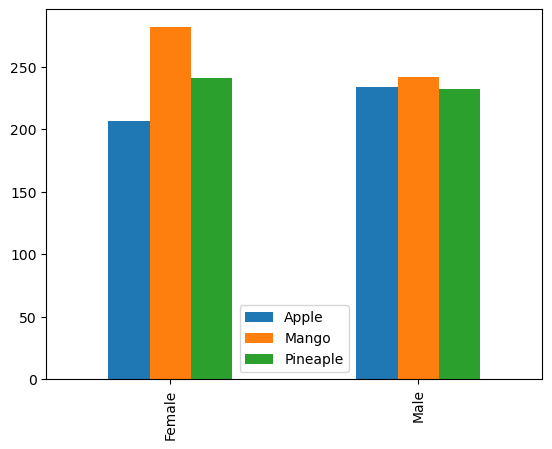

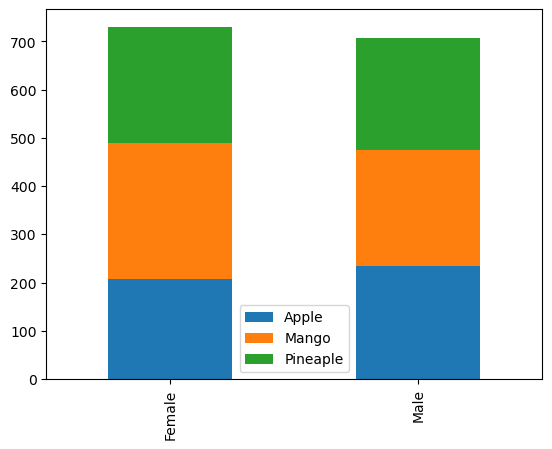

In [56]:
df_c = pd.DataFrame(
    data = [[207,282,241], [234,242,232]],
    columns= ['Apple', 'Mango', 'Pineaple'],
    index = ['Female', 'Male']
)

df_c
df_c.plot(kind='bar')
df_c.plot(kind='bar', stacked=True)

In [57]:
# import library
from scipy.stats import chi2_contingency


category1 = 'Gender'
category2 = 'Fruit'

# Fill Ho and Ha First
Ho = f"There is NO association between {category1} and {category2} preference (the proportions are equal)." # Ho typically no difference, no effect, no relationship
Ha = f"There is association between {category1} and {category2} preference (the proportions different)."

#cek angka
stats, pvaluec, dof, expected = chi2_contingency(df_c)


# Conclusion
if pvaluec >= 0.05:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluec}. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that {Ha}.
    {Ho}
    ''')
else:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluec}. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that {Ha}.
    ''')


    Null Hypothesis (Ho): There is NO association between Gender and Fruit preference (the proportions are equal).
    Alternative Hypothesis (Ha): There is association between Gender and Fruit preference (the proportions different).
    
    p-value = 0.1031971404730939. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that There is association between Gender and Fruit preference (the proportions different)..
    There is NO association between Gender and Fruit preference (the proportions are equal).
    


<hr>

## **Corelation**

Mencari seberapa kuat korelasi antara 1 data dengan lainnya, bedakan dengan causation

Need to be both qualitative

Causation berdampak langsung, tetapi corelation terlihat terdampak tapi tidak langsung

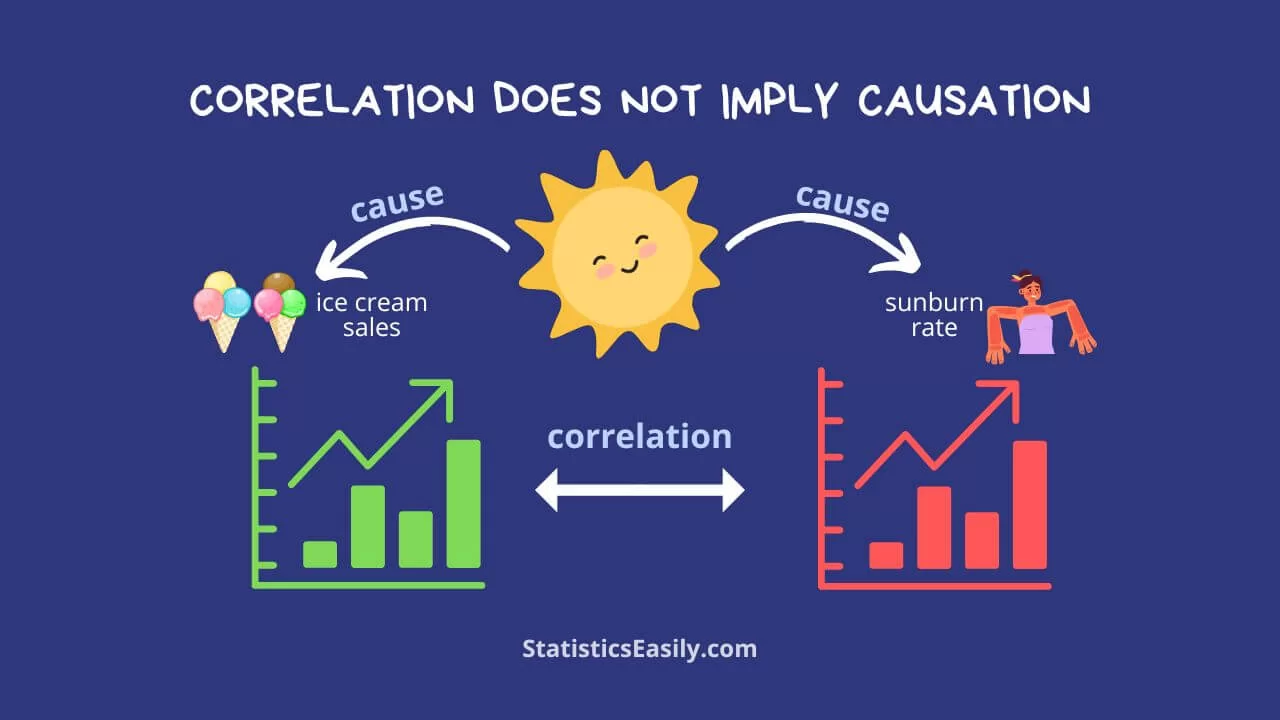

### **Spearman non Parametric**

Digunakan ketika data tidak terdistribusi normal

In [62]:
correlation = df['Reviews'].corr(df['Price'], method='spearman')
abs_corr = abs(correlation)

if abs_corr <= 0.2:
    strength = "very weak (no correlation)"
elif abs_corr <= 0.4:
    strength = "weak"
elif abs_corr <= 0.6:
    strength = "moderate"
elif abs_corr <= 0.9:
    strength = "strong"
else:
    strength = "very strong"

direction = "Positive" if correlation > 0 else "Negative" if correlation < 0 else "No correlation"

print(f"Correlation Score = {correlation:.3f}. {strength} | Direction: {direction}")


Correlation Score = -0.150. very weak (no correlation) | Direction: Negative


### **Pearson Parametric**

Digunakan ketika data terdistribusi normal

In [63]:
correlation = df['Reviews'].corr(df['Price'], method='pearson')
abs_corr = abs(correlation)

if abs_corr <= 0.2:
    strength = "very weak (no correlation)"
elif abs_corr <= 0.4:
    strength = "weak"
elif abs_corr <= 0.6:
    strength = "moderate"
elif abs_corr <= 0.9:
    strength = "strong"
else:
    strength = "very strong"

direction = "Positive" if correlation > 0 else "Negative" if correlation < 0 else "No correlation"

print(f"Correlation Score = {correlation:.3f}. {strength} | Direction: {direction}")

Correlation Score = -0.109. very weak (no correlation) | Direction: Negative
